In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
train_df=pd.read_csv("C:/Users/강민채/Desktop/KUBIG/ML/Team/data/train.csv")
test_df=pd.read_csv("C:/Users/강민채/Desktop/KUBIG/ML/Team/data/test.csv")

# 0. EDA

In [29]:
train_df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
train_df.info()

In [ ]:
train_df.isnull().sum()

In [ ]:
test_df.isnull().sum()

In [ ]:
#신용등급 분포 확인
sns.countplot('credit',data=train_df)
plt.show()

#숫자가 작을수록 높은 신용 등급. 가장 낮은 등급에 속하는 사람이 가장 많음.

In [ ]:
#credit 별 성별 분포 확인
sns.countplot('credit',hue='gender',data=train_df)
plt.show()

In [ ]:
#credit별 부동산 소유 여부
sns.countplot('credit',hue='reality',data=train_df)
plt.show()

In [ ]:
#credit별 income_type
sns.countplot('credit',hue='income_type',data=train_df)
plt.show()

In [ ]:
#credit별 edu_type 비교
sns.countplot('credit',hue='edu_type',data=train_df)
plt.show()

In [ ]:
#credit별 수치형 변수들 평균 비교
train_df.groupby('credit').mean()

In [ ]:
#credit별 수치형 변수들 최댓값 비교
train_df.groupby('credit').max()

In [ ]:
# credit 별 income_total 분포
sns.boxplot(x='credit',y='income_total',data=train_df)

In [ ]:
# 신용 등급에 따른 타 변수들의 분포에는 큰 차이가 없는 듯 함.

In [ ]:
train_df['occyp_type'].value_counts()

# 1. 전처리

결측치 처리

In [ ]:
train_df['occyp_type'].isna().sum()

In [30]:
# occyp_type 결측치 처리
# DAYS_EMPLOYED가 0 이거나 양수이면 실제 무직이니까 No job으로 처리.
employed_nojob=train_df[(train_df['DAYS_EMPLOYED']>=0)&(train_df['occyp_type'].isna()==True)]     #8171 중 4438개가 No job
employed_na=train_df[(train_df['DAYS_EMPLOYED']<0)&(train_df['occyp_type'].isna()==True)] 
employed_data=train_df.dropna()

In [31]:
employed_nojob.fillna({'occyp_type':'No job'},inplace=True)

C:\Users\강민채\AppData\Local\Temp\ipykernel_9528\646914387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed_nojob.fillna({'occyp_type':'No job'},inplace=True)


In [32]:
train_df_2=pd.concat([employed_na,employed_nojob,employed_data])

In [ ]:
train_df_2.info()    # occyp_type 결측치가 3733개로 줄었음.

In [ ]:
train_df_2['occyp_type'].isna().sum()

>> 남은 occyp_type 결측치는 어떻게 처리할지?/대체할 방법...  > 그냥 제거?/대체했을 때 vs 분류를 통해 대체했을 때 성능 비교?

In [34]:
train_df_2.dropna(inplace=True)   #제거 후 전체 데이터 22724개로 줄어듦.

이상치 처리

<AxesSubplot:>

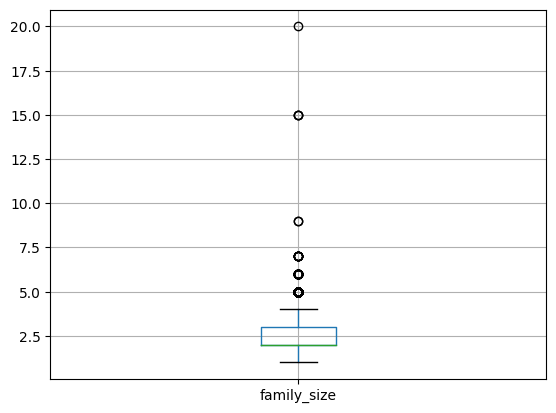

In [35]:
# Outlier 처리
train_df_2.boxplot('family_size')  

#수치형 변수들 각각 box plot 그려보면, 조정 필요한 건 child num, income_total, family_size

In [36]:
p1 = train_df_2['child_num'].quantile(0.99)
p2 = train_df_2['child_num'].quantile(0.001)
train_df_3 = train_df_2[(train_df_2['child_num'] < p1) & (train_df_2['child_num'] > p2)]

In [37]:
p3 = train_df_2['income_total'].quantile(0.99)
p4 = train_df_2['income_total'].quantile(0.001)
train_df_3 = train_df_2[(train_df_2['income_total'] < p3) & (train_df_2['income_total'] > p4)]

In [40]:
p5 = train_df_2['family_size'].quantile(0.99)
p6 = train_df_2['family_size'].quantile(0.001)
train_df_3 = train_df_2[(train_df_2['family_size'] < p5) & (train_df_2['family_size'] > p6)]

In [ ]:
# 이상치 제거 후 17944개로 데이터 줄어듦.

음수값 자료들에서 결측치(양수값) 처리

In [ ]:
# DAYS_BIRTH
train_df_3['DAYS_BIRTH'].describe()     #모두 음수값

In [ ]:
# DAYS_EMPLOYED 
train_df_3['DAYS_EMPLOYED'].describe()    #양수값이 있음. 0으로 바꿔줘야 함.

In [42]:
train_df_3['DAYS_EMPLOYED'].loc[train_df_3['DAYS_EMPLOYED']>0]=0

C:\Users\강민채\AppData\Local\Temp\ipykernel_9528\3158787518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_3['DAYS_EMPLOYED'].loc[train_df_3['DAYS_EMPLOYED']>0]=0


In [ ]:
# begin_month
train_df_3['begin_month'].value_counts()     #모두 0 이하.

>세 변수에서 값이 0인 것들 각각 어떻게 처리할지.. / days_employed는 0이면 무직 / 나머지 두 변수는 0이면 결측치.

결측치 처리 했으니, 음수값 변수들 양수로 변환

In [44]:
train_df_3["DAYS_EMPLOYED"] = np.abs(train_df_3["DAYS_EMPLOYED"])

train_df_3["DAYS_BIRTH"] = np.abs(train_df_3["DAYS_BIRTH"])

train_df_3["begin_month"] = np.abs(train_df_3["begin_month"]).astype(int)

C:\Users\강민채\AppData\Local\Temp\ipykernel_9528\3041842948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_3["DAYS_EMPLOYED"] = np.abs(train_df_3["DAYS_EMPLOYED"])
C:\Users\강민채\AppData\Local\Temp\ipykernel_9528\3041842948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_3["DAYS_BIRTH"] = np.abs(train_df_3["DAYS_BIRTH"])
C:\Users\강민채\AppData\Local\Temp\ipykernel_9528\3041842948.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [45]:
train_df_3.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,23113,0,1,0,0,0,No job,2.0,37,2.0
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,21253,0,1,0,1,0,No job,2.0,7,2.0
48,48,F,N,Y,0,99000.0,Pensioner,Secondary / secondary special,Married,House / apartment,23585,0,1,0,0,0,No job,2.0,4,2.0
52,52,F,N,Y,0,54000.0,Pensioner,Secondary / secondary special,Married,House / apartment,24044,0,1,0,1,0,No job,2.0,37,2.0
58,58,F,N,Y,0,144000.0,Pensioner,Secondary / secondary special,Married,House / apartment,23334,0,1,0,0,0,No job,2.0,23,2.0


>파생변수 생성

날짜 관련 변수들 단위 조정(파생변수)

In [46]:
# 날짜 관련 변수(birth, employed) 단위 조정. 
# 일 데이터 > 월/주 파생 변수 생성

# DAYS_BIRTH 월/주 파생변수 생성 >> 후에 이 파생변수와 다중공선성을 보이는 변수 제거해야 함.
train_df_3["DAYS_BIRTH_month"] = np.floor(train_df_3["DAYS_BIRTH"] / 30) - ((np.floor(train_df_3["DAYS_BIRTH"] / 30) / 12).astype(int) * 12)
train_df_3["DAYS_BIRTH_month"] = train_df_3["DAYS_BIRTH_month"].astype(int)
train_df_3["DAYS_BIRTH_week"] = np.floor(train_df_3["DAYS_BIRTH"] / 7) - ((np.floor(train_df_3["DAYS_BIRTH"] / 7) / 4).astype(int) * 4)
train_df_3["DAYS_BIRTH_week"] = train_df_3["DAYS_BIRTH_week"].astype(int)

C:\Users\강민채\AppData\Local\Temp\ipykernel_9528\972315058.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_3["DAYS_BIRTH_month"] = np.floor(train_df_3["DAYS_BIRTH"] / 30) - ((np.floor(train_df_3["DAYS_BIRTH"] / 30) / 12).astype(int) * 12)
C:\Users\강민채\AppData\Local\Temp\ipykernel_9528\972315058.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_3["DAYS_BIRTH_month"] = train_df_3["DAYS_BIRTH_month"].astype(int)
C:\Users\강민채\AppData\Local\Temp\ipykernel_9528\972315058.py:7: SettingWithCop

In [47]:
train_df_3.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,DAYS_BIRTH_month,DAYS_BIRTH_week
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,No job,2.0,37,2.0,2,1
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,1,0,1,0,No job,2.0,7,2.0,0,0
48,48,F,N,Y,0,99000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,No job,2.0,4,2.0,6,1
52,52,F,N,Y,0,54000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,1,0,1,0,No job,2.0,37,2.0,9,2
58,58,F,N,Y,0,144000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,No job,2.0,23,2.0,9,1


In [48]:
# 나이 변수 생성
train_df_3["Age"] = train_df_3["DAYS_BIRTH"] // 365

C:\Users\강민채\AppData\Local\Temp\ipykernel_9528\2617874472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_3["Age"] = train_df_3["DAYS_BIRTH"] // 365


In [49]:
# DAYS_EMPLOYED의 월/주 변수 생성
train_df_3["DAYS_EMPLOYED_month"] = np.floor(train_df_3["DAYS_EMPLOYED"] / 30) - ((np.floor(train_df_3["DAYS_EMPLOYED"] / 30) / 12).astype(int) * 12)
train_df_3["DAYS_EMPLOYED_month"] = train_df_3["DAYS_EMPLOYED_month"].astype(int)
train_df_3["DAYS_EMPLOYED_week"] = np.floor(train_df_3["DAYS_EMPLOYED"] / 7) - ((np.floor(train_df_3["DAYS_EMPLOYED"] / 7) / 4).astype(int) * 4)
train_df_3["DAYS_EMPLOYED_week"] = train_df_3["DAYS_EMPLOYED_week"].astype(int)

C:\Users\강민채\AppData\Local\Temp\ipykernel_9528\4215283008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_3["DAYS_EMPLOYED_month"] = np.floor(train_df_3["DAYS_EMPLOYED"] / 30) - ((np.floor(train_df_3["DAYS_EMPLOYED"] / 30) / 12).astype(int) * 12)
C:\Users\강민채\AppData\Local\Temp\ipykernel_9528\4215283008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_3["DAYS_EMPLOYED_month"] = train_df_3["DAYS_EMPLOYED_month"].astype(int)
C:\Users\강민채\AppData\Local\Temp\ipykernel_9528\4215283008.py

중복데이터 식별용 파생변수 생성

In [50]:
# ID 변수 생성
train_df_3['ID'] = \
train_df_3['child_num'].astype(str) + '_' + train_df_3['income_total'].astype(str) + '_' +\
train_df_3['DAYS_BIRTH'].astype(str) + '_' + train_df_3['DAYS_EMPLOYED'].astype(str) + '_' +\
train_df_3['work_phone'].astype(str) + '_' + train_df_3['phone'].astype(str) + '_' +\
train_df_3['email'].astype(str) + '_' + train_df_3['family_size'].astype(str) + '_' +\
train_df_3['gender'].astype(str) + '_' + train_df_3['car'].astype(str) + '_' +\
train_df_3['reality'].astype(str) + '_' + train_df_3['income_type'].astype(str) + '_' +\
train_df_3['edu_type'].astype(str) + '_' + train_df_3['family_type'].astype(str) + '_' +\
train_df_3['house_type'].astype(str) + '_' + train_df_3['occyp_type'].astype(str)

C:\Users\강민채\AppData\Local\Temp\ipykernel_9528\4107986370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_3['ID'] = \


In [51]:
train_df_3['ID'].value_counts()   #한 사람이 24개 만드는 등 중복 데이터 식별 가능해짐.

2_225000.0_16768_3088_1_0_0_4.0_M_N_N_Working_Higher education_Civil marriage_House / apartment_Laborers                                         24
1_157500.0_12676_1350_0_0_0_2.0_F_N_Y_State servant_Secondary / secondary special_Single / not married_House / apartment_Waiters/barmen staff    24
1_135000.0_10112_3170_1_1_0_3.0_F_N_Y_Working_Secondary / secondary special_Married_House / apartment_Laborers                                   20
0_225000.0_12322_3717_0_0_0_2.0_F_Y_Y_Working_Higher education_Married_House / apartment_Core staff                                              20
0_130500.0_13520_5488_0_0_0_2.0_F_N_Y_Working_Secondary / secondary special_Married_House / apartment_Core staff                                 19
                                                                                                                                                 ..
0_69750.0_23129_0_0_1_0_2.0_F_N_Y_Pensioner_Secondary / secondary special_Civil marriage_House / apartment_No jo

불필요 변수 제거

In [52]:
noneed=['index','FLAG_MOBIL']
train_df_3.drop(noneed,axis=1,inplace=True)

C:\Users\강민채\AppData\Local\Temp\ipykernel_9528\677455982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_3.drop(noneed,axis=1,inplace=True)


범주형 변수 수치화

In [53]:
# 범주형 변수 인코딩 - 다중공선성 여부 고려
from sklearn.preprocessing import OrdinalEncoder
cat=train_df_3.dtypes[train_df_3.dtypes == "object"].index.tolist()

In [54]:
encoder = OrdinalEncoder()
train_df_3[cat] = encoder.fit_transform(train_df_3[cat], train_df_3['credit'])

C:\Users\강민채\AppData\Local\Temp\ipykernel_9528\2699173519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_3[cat] = encoder.fit_transform(train_df_3[cat], train_df_3['credit'])


In [55]:
train_df_3['ID'] = train_df_3['ID'].astype('int64')

C:\Users\강민채\AppData\Local\Temp\ipykernel_9528\2903770819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_3['ID'] = train_df_3['ID'].astype('int64')


수치형 자료 표준화/정규화

In [56]:
num=train_df_3.dtypes[train_df_3.dtypes != "object"].index.tolist()

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df_3[num] = scaler.fit_transform(train_df_3[num])

C:\Users\강민채\AppData\Local\Temp\ipykernel_9528\3096622965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_3[num] = scaler.fit_transform(train_df_3[num])


다중공선성 확인

<AxesSubplot:>

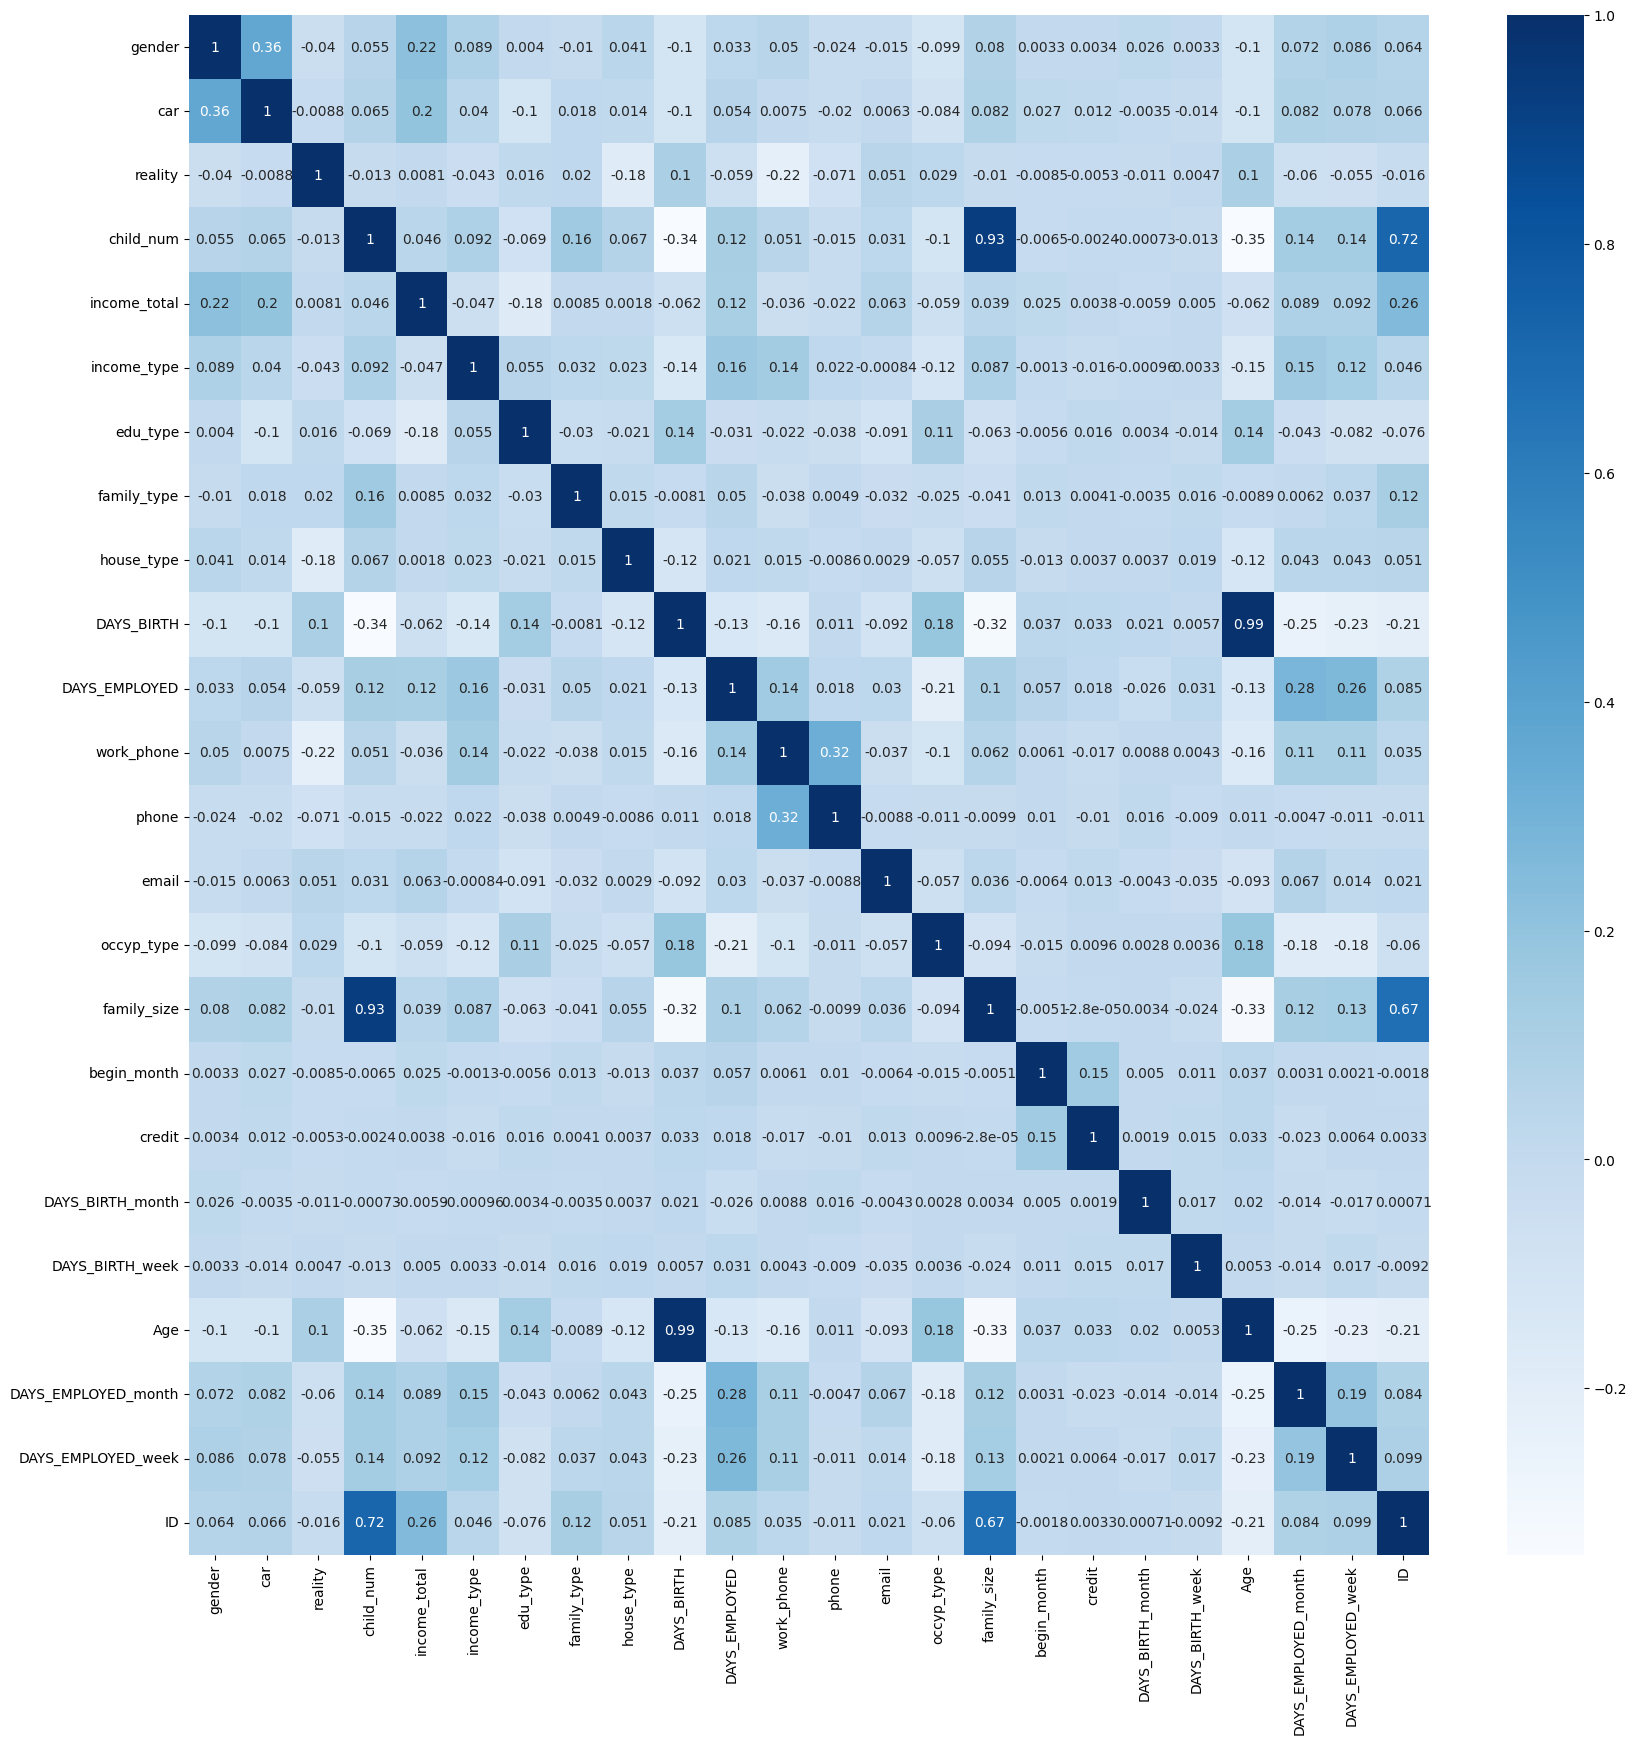

In [58]:
corr=train_df_3.corr(method='kendall')
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap="Blues")

# 2. 모델링

다중공선성 확인 및 변수 선택/차원 축소

# 3. 성능평가